(labs:cor16)=
# 6 Segmentation by histogram thresholding

## Objectives

* display and manipulate a histogram
* define a threshold from a histogram

## Image histogram

In [1]:
import skimage.io as io
import skimage.color as clr
import matplotlib.pyplot as plt
import numpy as np

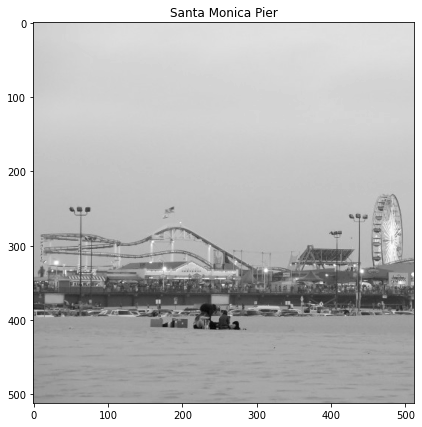

In [2]:
f = io.imread("santamonica.jpg")
f = clr.rgb2gray(f)
plt.figure(figsize=(7,7))
plt.imshow(f, cmap="gray")
plt.title('Santa Monica Pier')
plt.show()

The histogram is obtained with `matplotlib.pyplot.hist`.
As this function calculates the image from a vector, it must be used on the vectorized image, and not the image itself.
The vectorized image is obtained with `numpy.ravel`.
The pixels in a vectorized image are arrange in one dimension.

The histogram of the image is not unique: the number of bins must be specified.
Generally, we choose as many bins as gray levels, but this is not mandatory.
The following histograms are obtained with 16, 64 and 256 bins.
Note that the intensities of the image are not between 0 and 255 but between 0 and 1:
do you know why (ask the teacher if you cannot get the solution)?

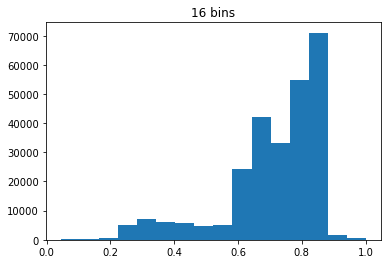

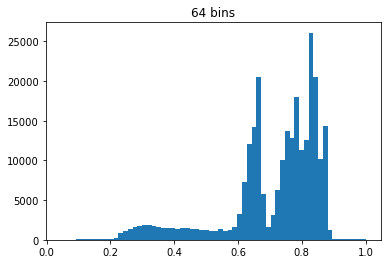

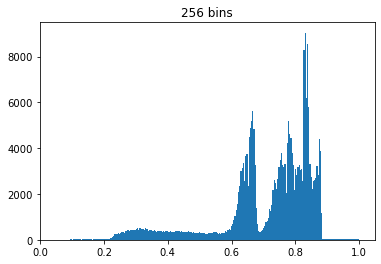

In [3]:
for k in [16, 64, 256]:
    
    plt.figure()
    plt.hist( f.ravel(), bins=k)
    plt.title("%d bins" % k)
    plt.show()

On the one hand, we easily observe that if the number of bars is low, then the distribution is coarse and some details
(such as the presence of two modes after 0.5) are not visible.
On the other hand, if the bin number is high, then we may have too much detail to analyse the result.
In conclusion, the bin number does not necessarily have to be equal to the number of gray levels in the image,
it depends on what we are going to do with the histogram!

## Segmentation in 2 classes

The presence of several modes in the histogram implies several possible thresholds.
The two images below correspond to the thresholds obtained around the three modes of the histogram.

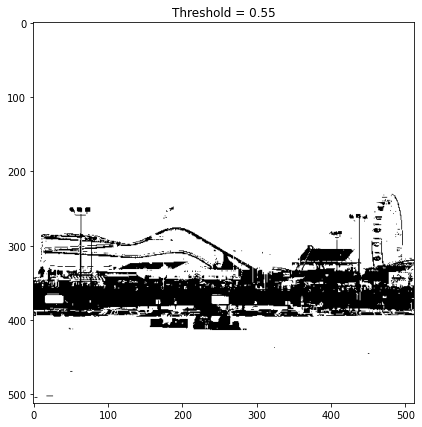

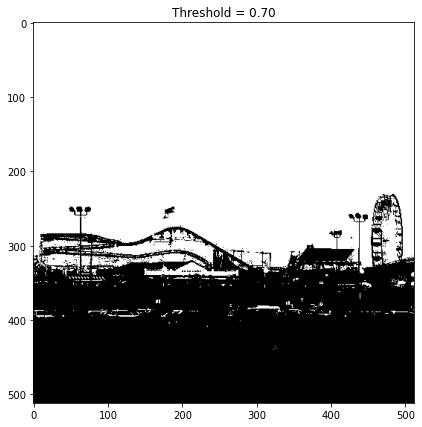

In [4]:
for seuil in [0.55, 0.70]:
    plt.figure(figsize=(7,7))
    plt.imshow(f>seuil, cmap="gray")
    plt.title("Threshold = %.2f" % seuil)
    plt.show()

## Segmentation in 3 classes

The histogram is a tool that represents the distribution of the intensities in an image.
We used it in this exercise to define a threshold on the image, then segmenting the image into two classes.
Furthermore, we can define several thresholds to obtain a segmentation with more than two classes, as for example in the image below.

How can you get this result?
Besides, which modes in the histogram correspond to the three identified zones?

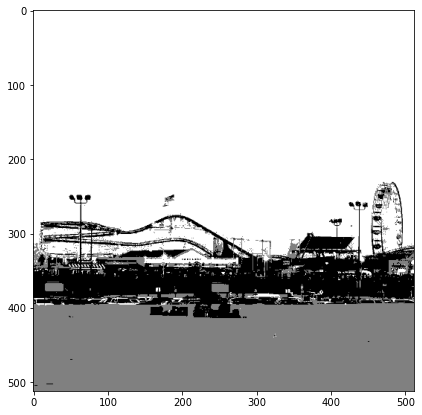

In [5]:
plt.figure(figsize=(7,7))
plt.imshow(1*(f>0.55)+1*(f>0.70), cmap="gray");
plt.show()

There are methods in the literature that are able to determine automatically the value of the threshold(s), such as [Otsu's method](C:segmentation:intro).